# Preparing Time Series from Wide-Form Data

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [7]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)

## Prepare the dataset for time series analysis

### Load in the Zillow Home Value Index dataframe.

In [10]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


### Filter the 4 largest cities into a new dataframe.


In [28]:
sizerank=[0,1,2,3]
df = df[df['SizeRank'].isin(sizerank)]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melt the data to long-form and prepare it for time series analysis.

In [29]:
# Melt the data to long-form and drop unnecessary columns 
melted = pd.melt(df.drop(columns=['RegionID','SizeRank','RegionType','StateName','Metro','CountyName']),id_vars=['RegionName','State'],value_name='HomePrice',var_name='Date')
melted

,RegionName,State,Date,HomePrice
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [30]:
# Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   HomePrice   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [31]:
# Set 'date' as index
melted = melted.set_index('Date')
melted

,RegionName,State,HomePrice
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


### Resample the dataframe as monthly frequency, grouped by City

In [33]:
df_ts = melted.groupby('RegionName').resample('M').sum(numeric_only=True)
df_ts

HomePrice
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

## Plot the home values for all 4 cities.

In [35]:
# Use unstack to convert nulti-index cities into columns
## Check level value 
df_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [36]:
unstacked = df_ts.unstack(level=0)
unstacked

HomePrice                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

- add a title and axis labels.
- Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. 

In [40]:
# Create a function use with matplotlib FuncFormatter
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

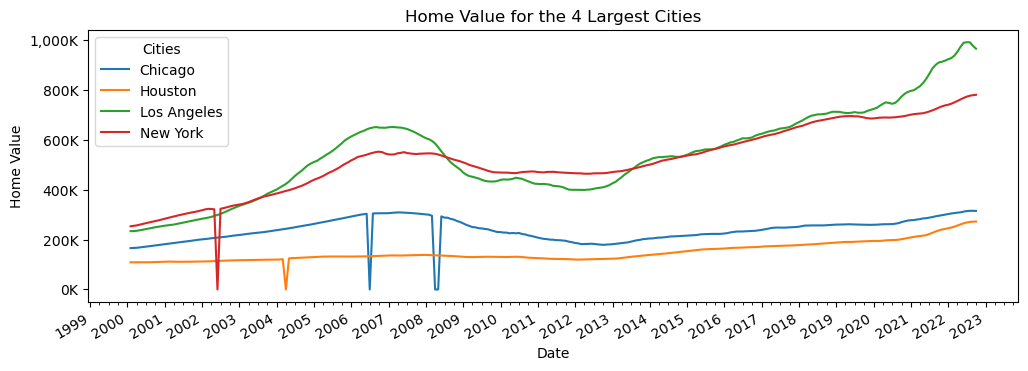

In [51]:
# Plot the home value for all 4 cities
ax=unstacked['HomePrice'].plot(title='Home Value for the 4 Largest Cities',ylabel='Home Value',x_compat=True)
ax.yaxis.set_major_formatter(fmt_thous)
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
loc_3months = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(loc_3months)
ax.legend(title='Cities');

**City had the highest typical home value at the end of 2008 and Which had the least?**

In [55]:
df_ts.loc[pd.IndexSlice[:,'2008-12-31'],:]

,,HomePrice
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


- New York City had the highest typical home value of $510,309 at the end of 2008
  
- Houston City had the lowest typical home value of $131,283 at the end of 2008

**home values change from November 2008 to December 2008 (in dollars)**

In [59]:
ts_diff = df_ts.diff().loc[pd.IndexSlice['2008-11':,'2008-12'],:]
ts_diff

,,HomePrice
RegionName,Date,
Chicago,2008-12-31,-5753.0
Houston,2008-12-31,-964.0
Los Angeles,2008-12-31,-12611.0
New York,2008-12-31,-4458.0
